# 🛒 **Predicción de ventas de alimentos**

* **Nombre Completo:** Mariana Arismendi
* **ID Coding Dojo:** 80511
* **Track:** Machine Learning

### 🎯 **Objetivos del proyecto**

* Realizar una limpieza y análisis exploratorio de los datos obtenidos de una cadena de tiendas que permitan hallar insights que ayuden a mejorar las operaciones de las tiendas.

* Saber qué tan bien se pueden predecir sus ventas de acuerdo al resto de características.

* Realizar una predicción de sus ventas según el modelo con mejor rendimiento.

El proyecto se realizará haciendo uso del siguiente [conjunto de datos](https://drive.google.com/file/d/1syH81TVrbBsdymLT_jl2JIf6IjPXtSQw/view).

### 📖 **Diccionario de datos**

| Nombre de la variable     | Descripción                                                                                                           |   |   |   |
|---------------------------|-----------------------------------------------------------------------------------------------------------------------|---|---|---|
| Item_Identifier           | Identificación única del producto                                                                                     |   |   |   |
| Item_Weight               | Peso del producto                                                                                                     |   |   |   |
| Item_Fat_Content          | Si el producto es bajo en grasa o regular                                                                             |   |   |   |
| Item_Visibility           | El porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |   |   |   |
| Item_Type                 | La categoría a la que el producto pertenece                                                                           |   |   |   |
| Item_MRP                  | Precio máximo de venta al público (precio de catálogo) del producto                                                   |   |   |   |
| Outlet_Identifier         | Identificación única de la tienda                                                                                     |   |   |   |
| Outlet_Establishment_Year | El año cuando se estableció la tienda                                                                                 |   |   |   |
| Outlet_Size               | El tamaño de la tienda con respecto a la superficie                                                                   |   |   |   |
| Outlet_Location_Type      | El tipo de área donde está ubicada la tienda                                                                          |   |   |   |
| Outlet_Type               | Si el marcado es un almacén o algún tipo de supermercado                                                              |   |   |   |
| Item_Outlet_Sales         | Ventas del producto en la tienda particular Es la variable objetivo a predecir                                        |  

## **❕ I. Introducción a los datos**

In [1]:
# Importar las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [2]:
# Importar datos
url = "https://github.com/marismendi9/sales-predictions/raw/main/sales_predictions.csv"

In [3]:
# Leer archivo
df = pd.read_csv(url)

In [4]:
# Imprimir las primeras 5 columnas (verificar que se subió correctamente el archivo)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **🧹 II. Limpieza de los datos**

In [5]:
# Ver cuántos duplicados hay
df.duplicated().sum()

0

In [6]:
# Corroborar estén bien escritos los nombres de las columnas
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Tamaño del dataframe
df.shape

(8523, 12)

In [8]:
# Examinar el número de valores únicos de cada columna:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
# Revisar tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Los tipos de datos son consistentes, procedemos a analizar los valores nulos.

In [10]:
# Identificar el número de non-values de cada columna
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Comenzamos con Item_Weight:
Hay 8522 filas - 1559 productos diferentes y 415 diferentes pesos. Deducimos que los valores nulos están para productos que tienen su peso descrito en otras filas. O sea que por GroupBy, que omite nulos, podemos identificarlos para luego reemplazarlos.

Este proceso no crea fuga de datos ya que estamos relacionando estos valores con los valores correspondientes de otra columna, no estamos deduciendo sus valores, si no asignando los correctos teniendo en cuenta que cada producto y outlet tendrá unas características únicas.

In [11]:
# Agrupamos el Item_Identifier y el Item_Weight y luego reemplazamos los valores nulos con esta información:
x = df.groupby('Item_Identifier')['Item_Weight'].max()

df = df.set_index('Item_Identifier')
df['Item_Weight'] = df['Item_Weight'].fillna(x)
df = df.reset_index()

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
# Identificamos si quedan non-values en esta columna:
df.isna().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Siguen habiendo 4 valores nulos, por lo cual se debe tratar de ítems únicos. No vamos a rellenar estos valores hasta no dividir los datos. Otra opción podría ser eliminarlos definitivamente, como haremos ahora.

In [13]:
df['Item_Weight'].fillna(0, inplace = True)
df['Item_Weight'].drop(0);

Los demás datos nulos corresponden al tamaño de la tienda; notamos que solo hay 10 tiendas. Procedemos a verificar si cada tienda tiene asignado su tamaño mediante un groupby para poder autocompletar los nulos con esta información

In [14]:
# Identificamos el tamaño de cada tienda
df.groupby('Outlet_Identifier')['Outlet_Size'].max()

Outlet_Identifier
OUT010       NaN
OUT013      High
OUT017       NaN
OUT018    Medium
OUT019     Small
OUT027    Medium
OUT035     Small
OUT045       NaN
OUT046     Small
OUT049    Medium
Name: Outlet_Size, dtype: object

Existen tres tiendas que no tienen la característica de tamaño definida. No vamos a reemplzar estos datos nulos hasta no hacer la división y, a pesar de ser una categoría ordinal, no vamos a reemplazar sus nombres por valores numéricos ya que aún existen datos nulos y no se podría rellenar con un promedio (como haremos con Item_Weight que si son datos numéricos).

In [15]:
# Verificamos datos inconsistentes en las columnas categóricas:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
# Realizamos reemplazo de variables categóricas
df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}, inplace = True)

# Verificamos que se hayan hecho los reemplazos correctamente
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

## 📊 **IV. Análisis exploratorio de datos**

In [17]:
# Dataframe productos
df_p = df.drop(columns={'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'})

df_p.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
# Calcular las correlaciones
corr = df_p.corr()

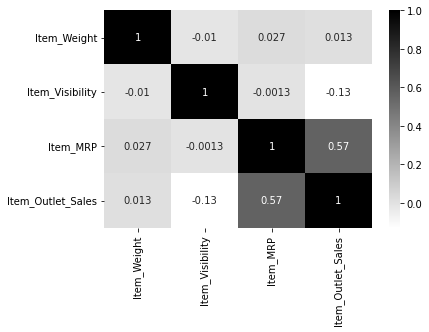

In [19]:
# Crear el mapa de calor con los coeficientes de correlación actuales
import seaborn as sns
sns.heatmap(corr, cmap = 'gray_r', annot = True)

* Existe una correlación moderada a fuerte entre los precios y las ventas de los productos, sin embargo esto podría deberse a la misma alza de precio que causa mayor entrada de dinero por ese lado, hay que seguir explorando. No existe ninguna otra correlación visible.

In [20]:
# Mapa de calor unificado
corr_3 = df.corr()

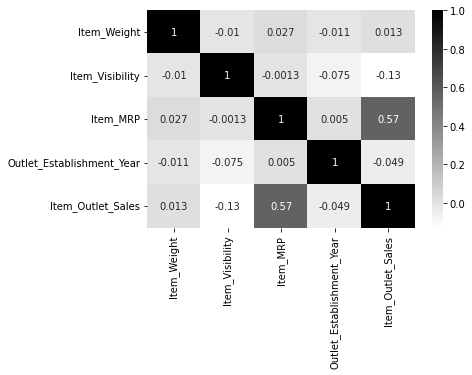

In [21]:
# Crear el mapa de calor con los coeficientes de correlación actuales
import seaborn as sns
sns.heatmap(corr_3, cmap = 'gray_r', annot = True)

* La única correlación nueva que existe es una muy leve sobre la visibilidad de los items, respecto al tipo de tienda. Según esto, las tiendas pequeñas tendrían más visibilidad de los items, pero esto se puede deducir desde el punto de vista de que las tiendas pequeñas tendrán menor cantidad de items, lo cual hace que la visibilidad de cada ítem sea inversamente más grande en cuanto menor sea el tamaño. Sin embargo es algo muy trivial, no aporta mucho y la correlación es muy pequeña.

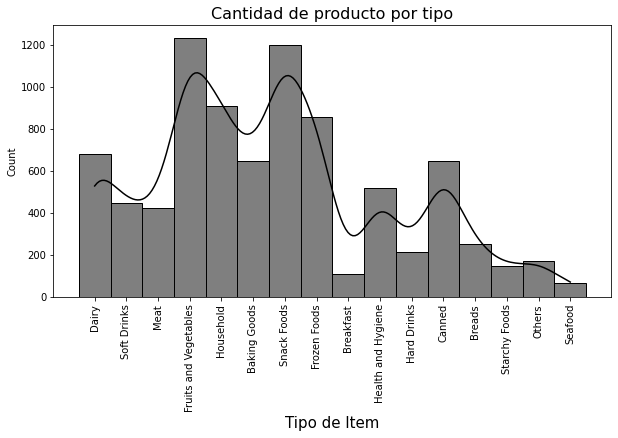

In [22]:
# Histograma variable Item_Type
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df['Item_Type'], bins = 16, edgecolor='black', kde = True, color='k')
plt.title('Cantidad de producto por tipo', fontsize=16)
plt.xlabel("Tipo de Item", fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

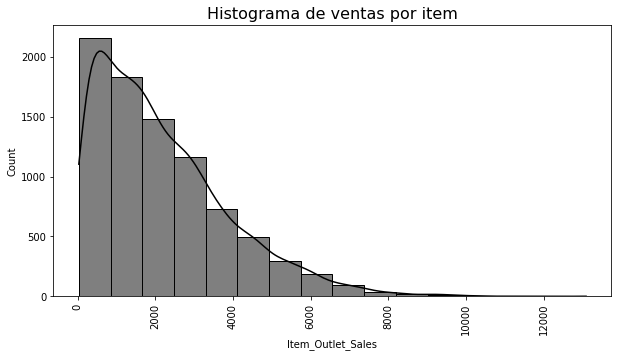

In [23]:
# Histograma variable Item_Outlet_Sales
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df['Item_Outlet_Sales'], bins = 16, edgecolor='black', kde = True, color='k')
plt.title('Histograma de ventas por item', fontsize=16)
plt.xticks(rotation = 90)
plt.show()

* Este gráfico me indica de qué categoría tienen más productos y de cuáles no. Por ejemplo manejan mucho lo que son frutas y vegetales y snack y menos lo que es desayuno y comida de mar, este último a pesar de que manejan bastante comida congelada.

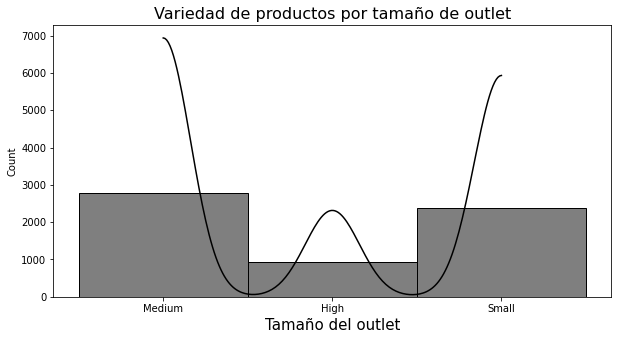

In [24]:
# Histograma variable Outlet_Size
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df['Outlet_Size'], bins = 3, edgecolor='black', kde = True, color='k')
plt.title('Variedad de productos por tamaño de outlet', fontsize=16)
plt.xlabel("Tamaño del outlet", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

* Este gráfico me indica de que la mayor variedad de productos se maneja en los outlets medianos y que los grandes manejan menos variedad, incluso menos que las tiendas pequeñas, contrario a lo que normalmente se vería.

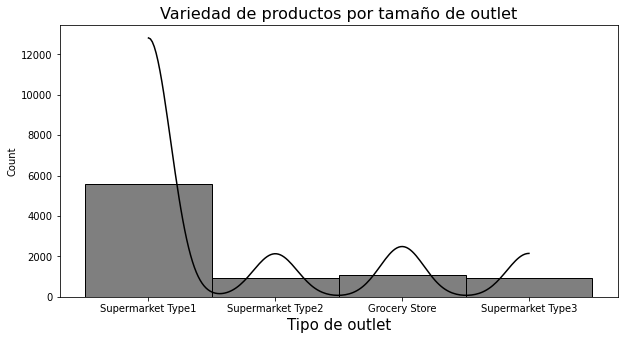

In [25]:
# Histograma variable Outlet_Type
fig, ax = plt.subplots(figsize = (10, 5))
sns.histplot(data = df['Outlet_Type'], bins = 4, edgecolor='black', kde = True, color='k')
plt.title('Variedad de productos por tamaño de outlet', fontsize=16)
plt.xlabel("Tipo de outlet", fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

* Aquí podemos ver que existe una fuerte tendencia respecto a los 'Supermercados tipo 1', quienes manejan una variedad de maás de 5000 productos, contra los otros tipos de tiendas, con un promedio aproximado de 1000 productos.

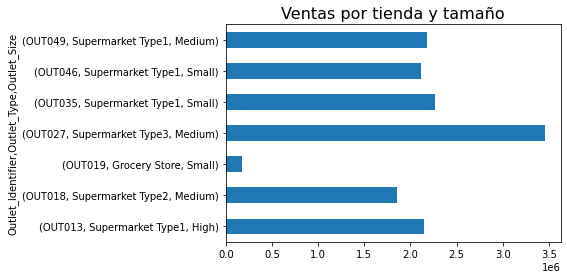

In [26]:
# Gráfico de barras de volumen en ventas por outlet, tipo y tamaño
(df.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Size'])['Item_Outlet_Sales'].sum()).plot(kind = 'barh')
plt.title('Ventas por tienda y tamaño', fontsize=16);

* En el anterior gráfico notamos que el volumen de ventas en cada tienda es constante para la mayoría, excepto para las tiendas pequeñas que venden notablemente más poco; ni para el supermercado de tipo 3, que vende visiblemente más que el resto, a pesar de estar catalogado en tamaño mediano.

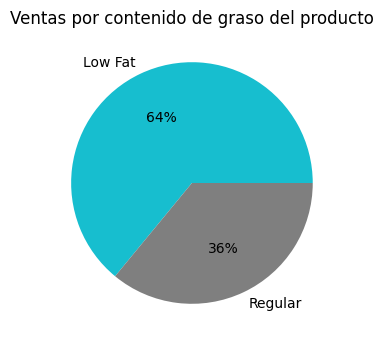

In [27]:
# Gráfico circular de volumen de ventas por contenido graso del producto
x = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
labels = ['Low Fat', 'Regular']
colors = ['tab:cyan', 'tab:gray']

fig, ax = plt.subplots(dpi=100)
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%')
ax.set_title('Ventas por contenido de graso del producto')
plt.show()

* Los productos bajos en grasa representan mayor volumen de ventas; lo cual tiene sentido en el hecho de que se tiene mayor catálogo de productos bajos en grasa. Pero se venden en las mismas proporciones.

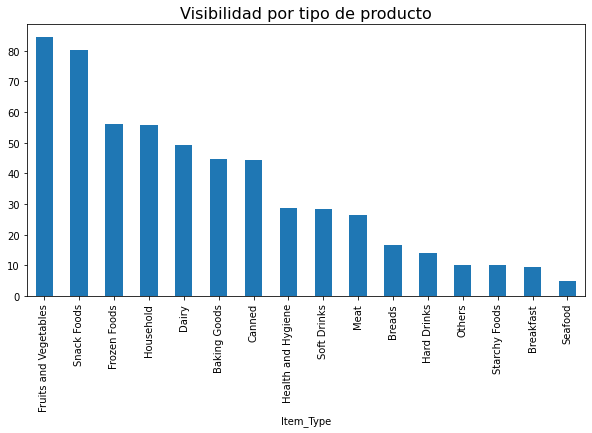

In [28]:
# Gráfico de barras por visibilidad total de cada tipo de producto
fig, ax = (plt.subplots(figsize = (10, 5)))
((df.groupby('Item_Type')['Item_Visibility'].sum()).sort_values(ascending=False)).plot(kind = 'bar')
plt.title('Visibilidad por tipo de producto', fontsize=16);

* Podemos observar que la visibilidad de los tipos de productos es más o menos proporcional al volumen de ventas de los productos, en ese sentido, estarían bien distribuidas los productos en las tiendas.

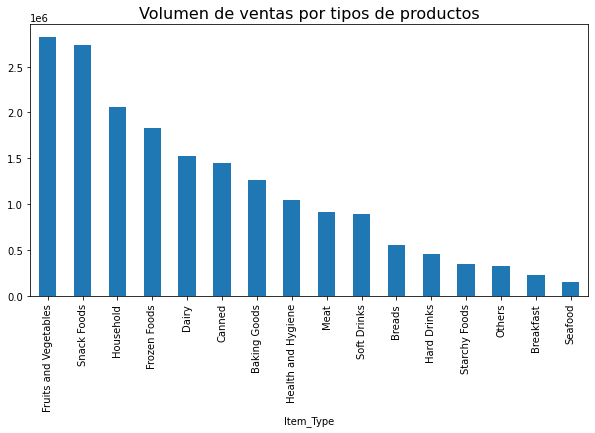

In [29]:
# Volumen de ventas por tipo de producto
fig, ax = (plt.subplots(figsize = (10, 5)))
(((df.groupby('Item_Type')['Item_Outlet_Sales'].sum()).sort_values(ascending = False))).plot(kind = 'bar')
plt.title('Volumen de ventas por tipos de productos', fontsize=16);

* Podemos ver en orden descendente los tipos de productos más vendidos a menos vendidos

Se decide montar una nueva columna en una copia del dataframe diviendo el volumen de ventas por ítem entre su precio máximo (MRP), redondeamos hacia para tener una idea más detallada sobre las salidas en cantidad de cada producto.

In [30]:
# Crear un nuevo df
df2 = df.copy()

# Nueva columna en df2
df2['Quantity']=round(df2['Item_Outlet_Sales']/df2['Item_MRP'],0)
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Quantity
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,15.0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,9.0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,15.0
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,4.0
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,18.0


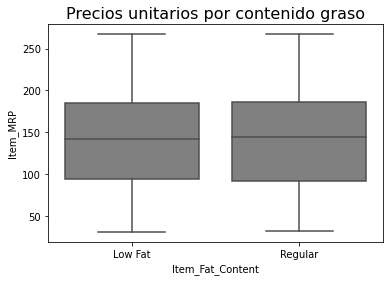

In [31]:
# Comparación de precios unitarios por contenido graso de los productos
sns.boxplot(x='Item_Fat_Content', y='Item_MRP', data=df, color = 'gray')
plt.title('Precios unitarios por contenido graso', fontsize=16);

* Los precios para ambas categorías son relativamente iguales, incluso siendo ligeramente más altos los precios de productos regulares; esto podría indicar una preferencia por los bajos en grasa, ya que normalmente son un poco más costosos que los regulares y, para este caso, no es así y aún así representan más del 60% de las ventas.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

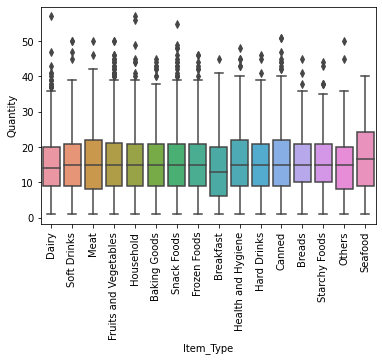

In [32]:
# Comparación de cantidades vendidas por tipo de producto
sns.boxplot(x='Item_Type', y='Quantity', data=df2)
plt.xticks(rotation = 90)

* Notamos que la mayoría de las categorías se vende en las mismas proporciones, excepto por algunos datos atípicos, mayormente en lácteos, frutas y vegetales, snacks, etc. Pero es muy estable la distribución de los datos en general.
No hay datos atípicos en comida de mar únicamente, se podría decir que no se hacen grandes compras de esto; para lo demás si puede pasar.
Esto también podría analizarse para tiendas específicas.

## ⚙️ **IV. Preprocesamiento de los datos**

Si se desea saber ¿qué tan bien se pueden predecir las ventas de productos en varias basándose en el resto de características? Designaremos la columna objetivo a *Item Outlet Sales*

In [33]:
# Chequear número de datos únicos de cada columna
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

### **Tipos de características de las variables**

**Ordinales:**
* Item_Fat_content (Low Fat, Regular)
* Outlet_Size (Small, Medium, High)

**Nominales:**
* Item_Identifier
* Item_Type
* Outlet_Identifier
* Outlet_Location_Type (Tier 1, Tier 2, Tier 3) - orden desconocido
* Outlet_Type (Grocery Store, Supermarket Type1, Supermarket Type2, Supermarket Type3) - orden desconocido

**Numéricas:**
* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales

Se toma la decisión de convertir algunas categorías categóricas a numéricas ordinales para poder visualizar algunas relaciones entre sí, ya que sobre todo son categorías de tamaño, lo cual se puede representar numéricamente de más pequeñas a más grandes.

In [34]:
# Realizar reemplazo de variables categóricas
df['Item_Fat_Content'].replace({'Low Fat': 0, 'Regular': 1}, inplace = True)
df['Outlet_Size'].replace({'Small': 1, 'Medium': 2, 'High': 3}, inplace = True)

In [35]:
# Eliminamos la columna de Item_Identifier ya que posee 1559 variables nominales y hará más difícil hacer una correcta predicción
# Aparentemente no es tan necesaria, podemos guiarnos por el tipo de producto y otras características
df.drop(columns = 'Item_Identifier', inplace = True)

In [36]:
# División de la validación
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [37]:
# Instanciar selectores de columnas
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [38]:
## Instanciar transformadores
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent') # Outlet_Size
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [39]:
# Pipeline numérico
numeric_pipe = make_pipeline(freq_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler())])

In [40]:
# Pipeline categórico
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [41]:
## Instanciar ColumnTransformer
# Tuples para Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3e2c486d00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3e2c486d90>)])

In [42]:
## Transformador de datos
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3e2c486d00>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f3e2c486d90>)])

In [43]:
# Transformar train y test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [44]:
## Ver el resultado
# Comprobar los valores faltantes y que los datos se escalen y tengan una codificación one-hot
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')

# Ver numpy resultante
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 39)




array([[ 0.73644992, -0.7403206 , -0.71277507, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.49937358,  1.35076614, -1.29105225, ...,  0.        ,
         1.        ,  0.        ],
       [-0.12564588,  1.35076614,  1.81331864, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.00585486, -0.7403206 , -0.92052713, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.59854572, -0.7403206 , -0.2277552 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.73644992, -0.7403206 , -0.95867683, ...,  1.        ,
         0.        ,  0.        ]])

## 🧮 **V. Aplicación de modelos**

### **📈 A. Modelo de regresión lineal**

In [45]:
# Importar el modelo
from sklearn.linear_model import LinearRegression

In [46]:
# Hacer una instancia del modelo de regresión
reg = LinearRegression()

In [47]:
# Entrenar el modelo en los datos de entrenamiento
reg.fit(X_train_processed, y_train)

LinearRegression()

In [48]:
## Obtener los datos de R^2 después de ajustar nuestro modelo
# Datos de entrenamiento
rl_train_score = reg.score(X_train_processed, y_train) 
print(rl_train_score)

0.5615452866088471


In [49]:
# Datos de prueba
rl_test_score = reg.score(X_test_processed, y_test)
print(rl_test_score)

0.5671089881717881


In [50]:
## Obtención de predicciones
# Predicciones del conjunto de entrenamiento
train_preds = reg.predict(X_train_processed)
# Predicciones del conjunto de prueba
test_preds = reg.predict(X_test_processed)

In [51]:
# Raíz del error cuadrático medio (RECM)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)

rmse train: 1139.1168959865379
rmse test: 1092.8570216316857


### 📌 **Evaluación de rendimiento del modelo**
Según los resultados obtenidos, el modelo se encuentra bien ajustado; sin embargo, no es muy efectivo en sus predicciones, así mismo como presenta un error muy alto en el error cuadrático medio de los datos de entrenamiento y de prueba.

### **🌳 A. Modelo de árbol de regresión**

In [52]:
# Importar el modelo
from sklearn.tree import DecisionTreeRegressor

In [53]:
# Hacer una instancia del modelo
dec_tree = DecisionTreeRegressor(random_state=42)

In [54]:
# Ajustar el modelo usando los datos de entrenamiento
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [55]:
# Predecir los valores objetivos para el conjunto de entrenamiento y de prueba
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [56]:
# Evaluar el modelo
train_score = dec_tree.score(X_train_processed, y_train)
test_score = dec_tree.score(X_test_processed, y_test)
print(train_score)
print(test_score)

1.0
0.1753932274200185


El modelo presenta evidentemente un alto sobreajuste.

In [57]:
# Profundidad de nuestro árbol por defecto
dec_tree.get_depth()

40

In [58]:
# Nodos hojas de nuestro árbol
dec_tree.get_n_leaves()

6263

In [59]:
## Encontrar el max_depth óptimo (ajuste de hiperparámetro)
# Lista de valores a probar para max_depth:
max_depth_range = list(range(2, 20))
# Lista para almacenar la puntuación para cada valor de max_depth:
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

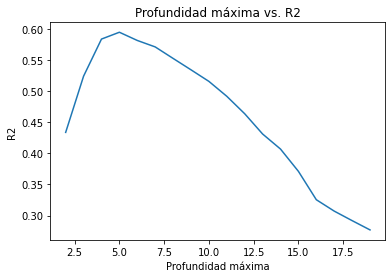

In [60]:
# Visualizar qué max_depth lleva a una puntuación R2 más alta
import matplotlib.pyplot as plt
plt.plot(max_depth_range, r2)
plt.xlabel('Profundidad máxima')
plt.ylabel('R2')
plt.title('Profundidad máxima vs. R2');

Por la imagen anterior, parece que el mejor R2 del modelo es cuando el parámetro max_depth es 5 aproximadamente.

In [61]:
# Ejecutar el modelo con nuestro valor optimizado para max_depth
dec_tree_n = DecisionTreeRegressor(max_depth = 5, random_state = 42)
dec_tree_n.fit(X_train_processed, y_train)
train_n_score = dec_tree_n.score(X_train_processed, y_train)
test_n_score = dec_tree_n.score(X_test_processed, y_test)
print(train_n_score)
print(test_n_score)

0.6039092654846363
0.594954272967407


In [62]:
# Raíz del error cuadrático medio (RECM)
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print('rmse train:',rmse_train)
print('rmse test:',rmse_test)

rmse train: 4.925864104892086e-15
rmse test: 1508.3339673029034


### 📌 **Evaluación de rendimiento del modelo**
Según los resultados obtenidos, el modelo se pudo ajustar para que tuviese un buen comportamiento; sin embargo continúa siendo inefectivo para realizar predicciones con un R2 que apenas supera al modelo de regresión lineal y viendo que, a pesar de tener un error cuadrático medio bastante bajo en los datos de entrenamiento, es muy alto en los datos de prueba, incluso superior que el modelo de regresión lineal.

### 🧠 **Pensamientos finales**
El modelo que 'mejor resultado' arrojó ser el de árbol de regresión; sin embargo, su R2 continúa siendo muy bajo y a pesar de que se pudo reducir su varianza, su error continúa sienod muy alto.

Yo recomendaría no aplicar un modelo de esta forma, hacer más análisis como investigar qué variables no infieren tanto en el vector objetivo, así como segmentar las predicciones para cada outlet, ya que por las características tan variadas de estas, podríamos sesgar la muestra que es lo que vemos con el R2 actual, que parece estar subajustado por la aleatoriedad de los datos mismos.

Así que en ese orden de ideas, aún no recomendaría ningún modelo: analizaría las variables más importantes y eliminaría aquellas que no pesen tanto en la predicción (baja interdependencia), dividiría el dataframe por outlet y por tipo de producto para realizar las predicciones, luego probaría este y otros modelos que me den resultados óptimos.

Finalmente con los resultados obtenidos podría tomaría decisiones de negocio objetivas y más acertadas.

### 📑 **Referencias**
* [Curso CodingDojo-DataScience](https://github.com/fralfaro/CodingDojo-DataScience)
* [Curso MAT281_2022](https://github.com/fralfaro/MAT281_2022)
* [Delftstack](https://www.delftstack.com)